# LAB-15 2024 總統選舉資料

## 資料來源
* [監察院-政治獻金公開查閱平台](https://ardata.cy.gov.tw/data/search/advanced)：一般查詢 -> 進階查詢<br>
  1. 選舉名稱 = 113年總統、副總統選舉
  2. 滑鼠點擊 `查詢`
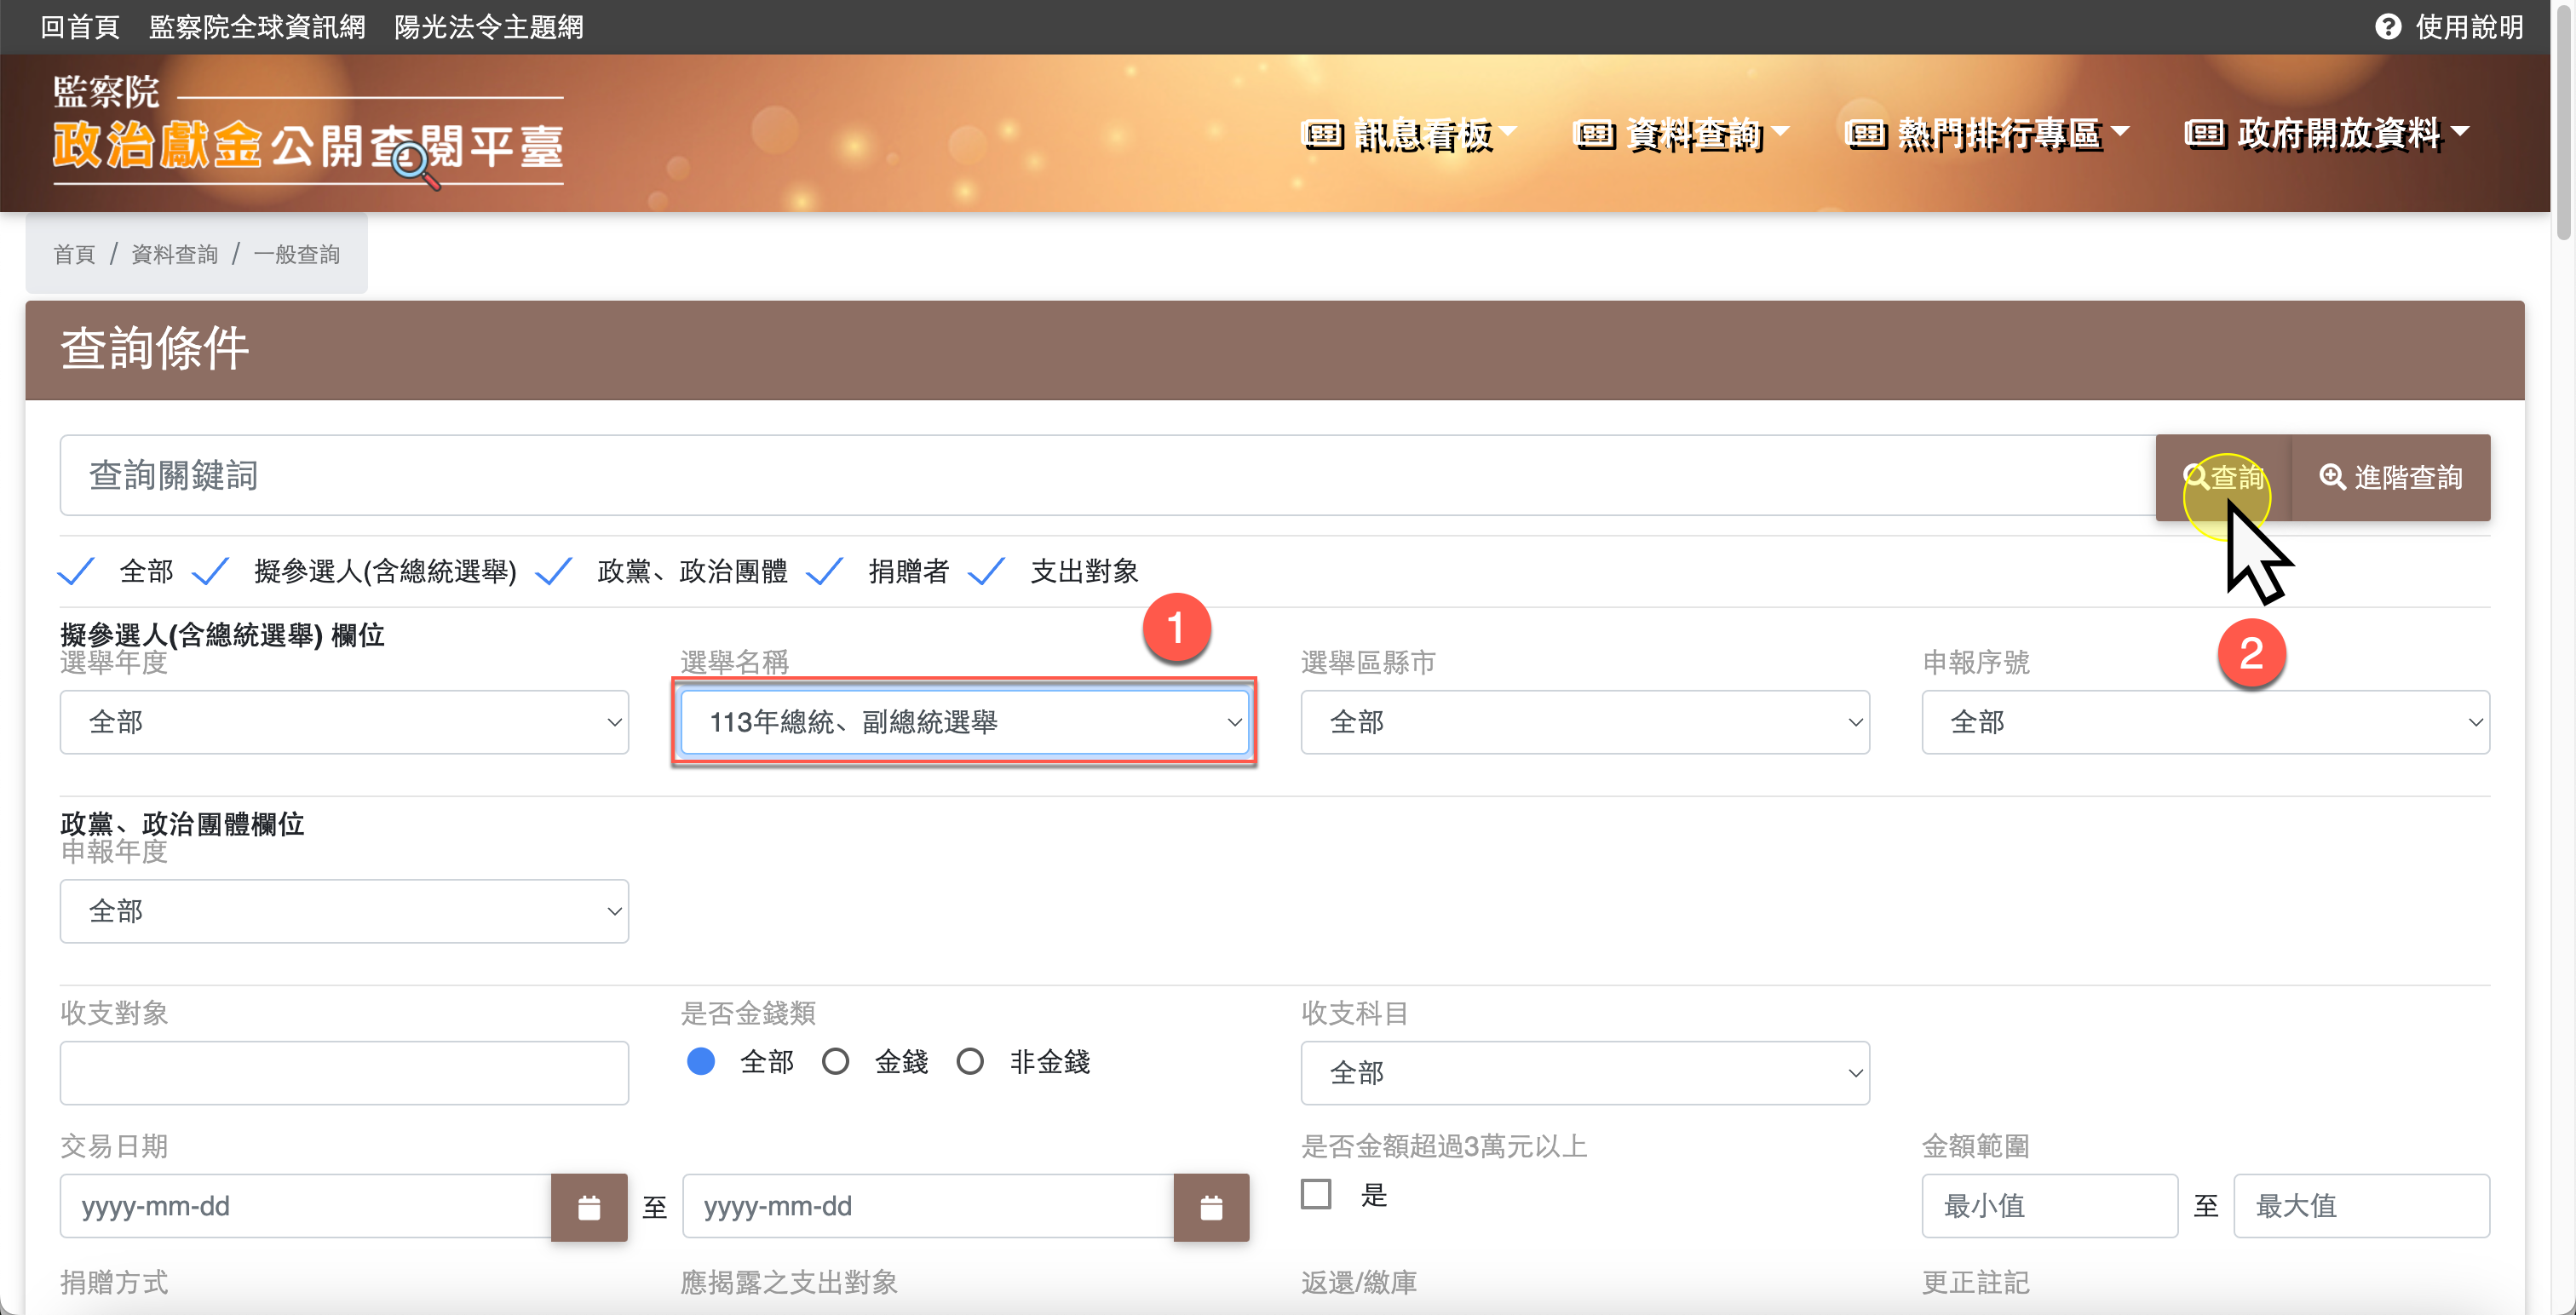

* 查詢結果<br>
  1. 滑鼠移到 `產本頁電子檔`
  2. Browser 下方會顯示 API 連結
  3. 顯示資料總筆數 260157 (先記在紙上)，同時畫面預設為每頁50筆
  4. 於 `產本頁電子檔` 按滑鼠右鍵 `複製連結網址`
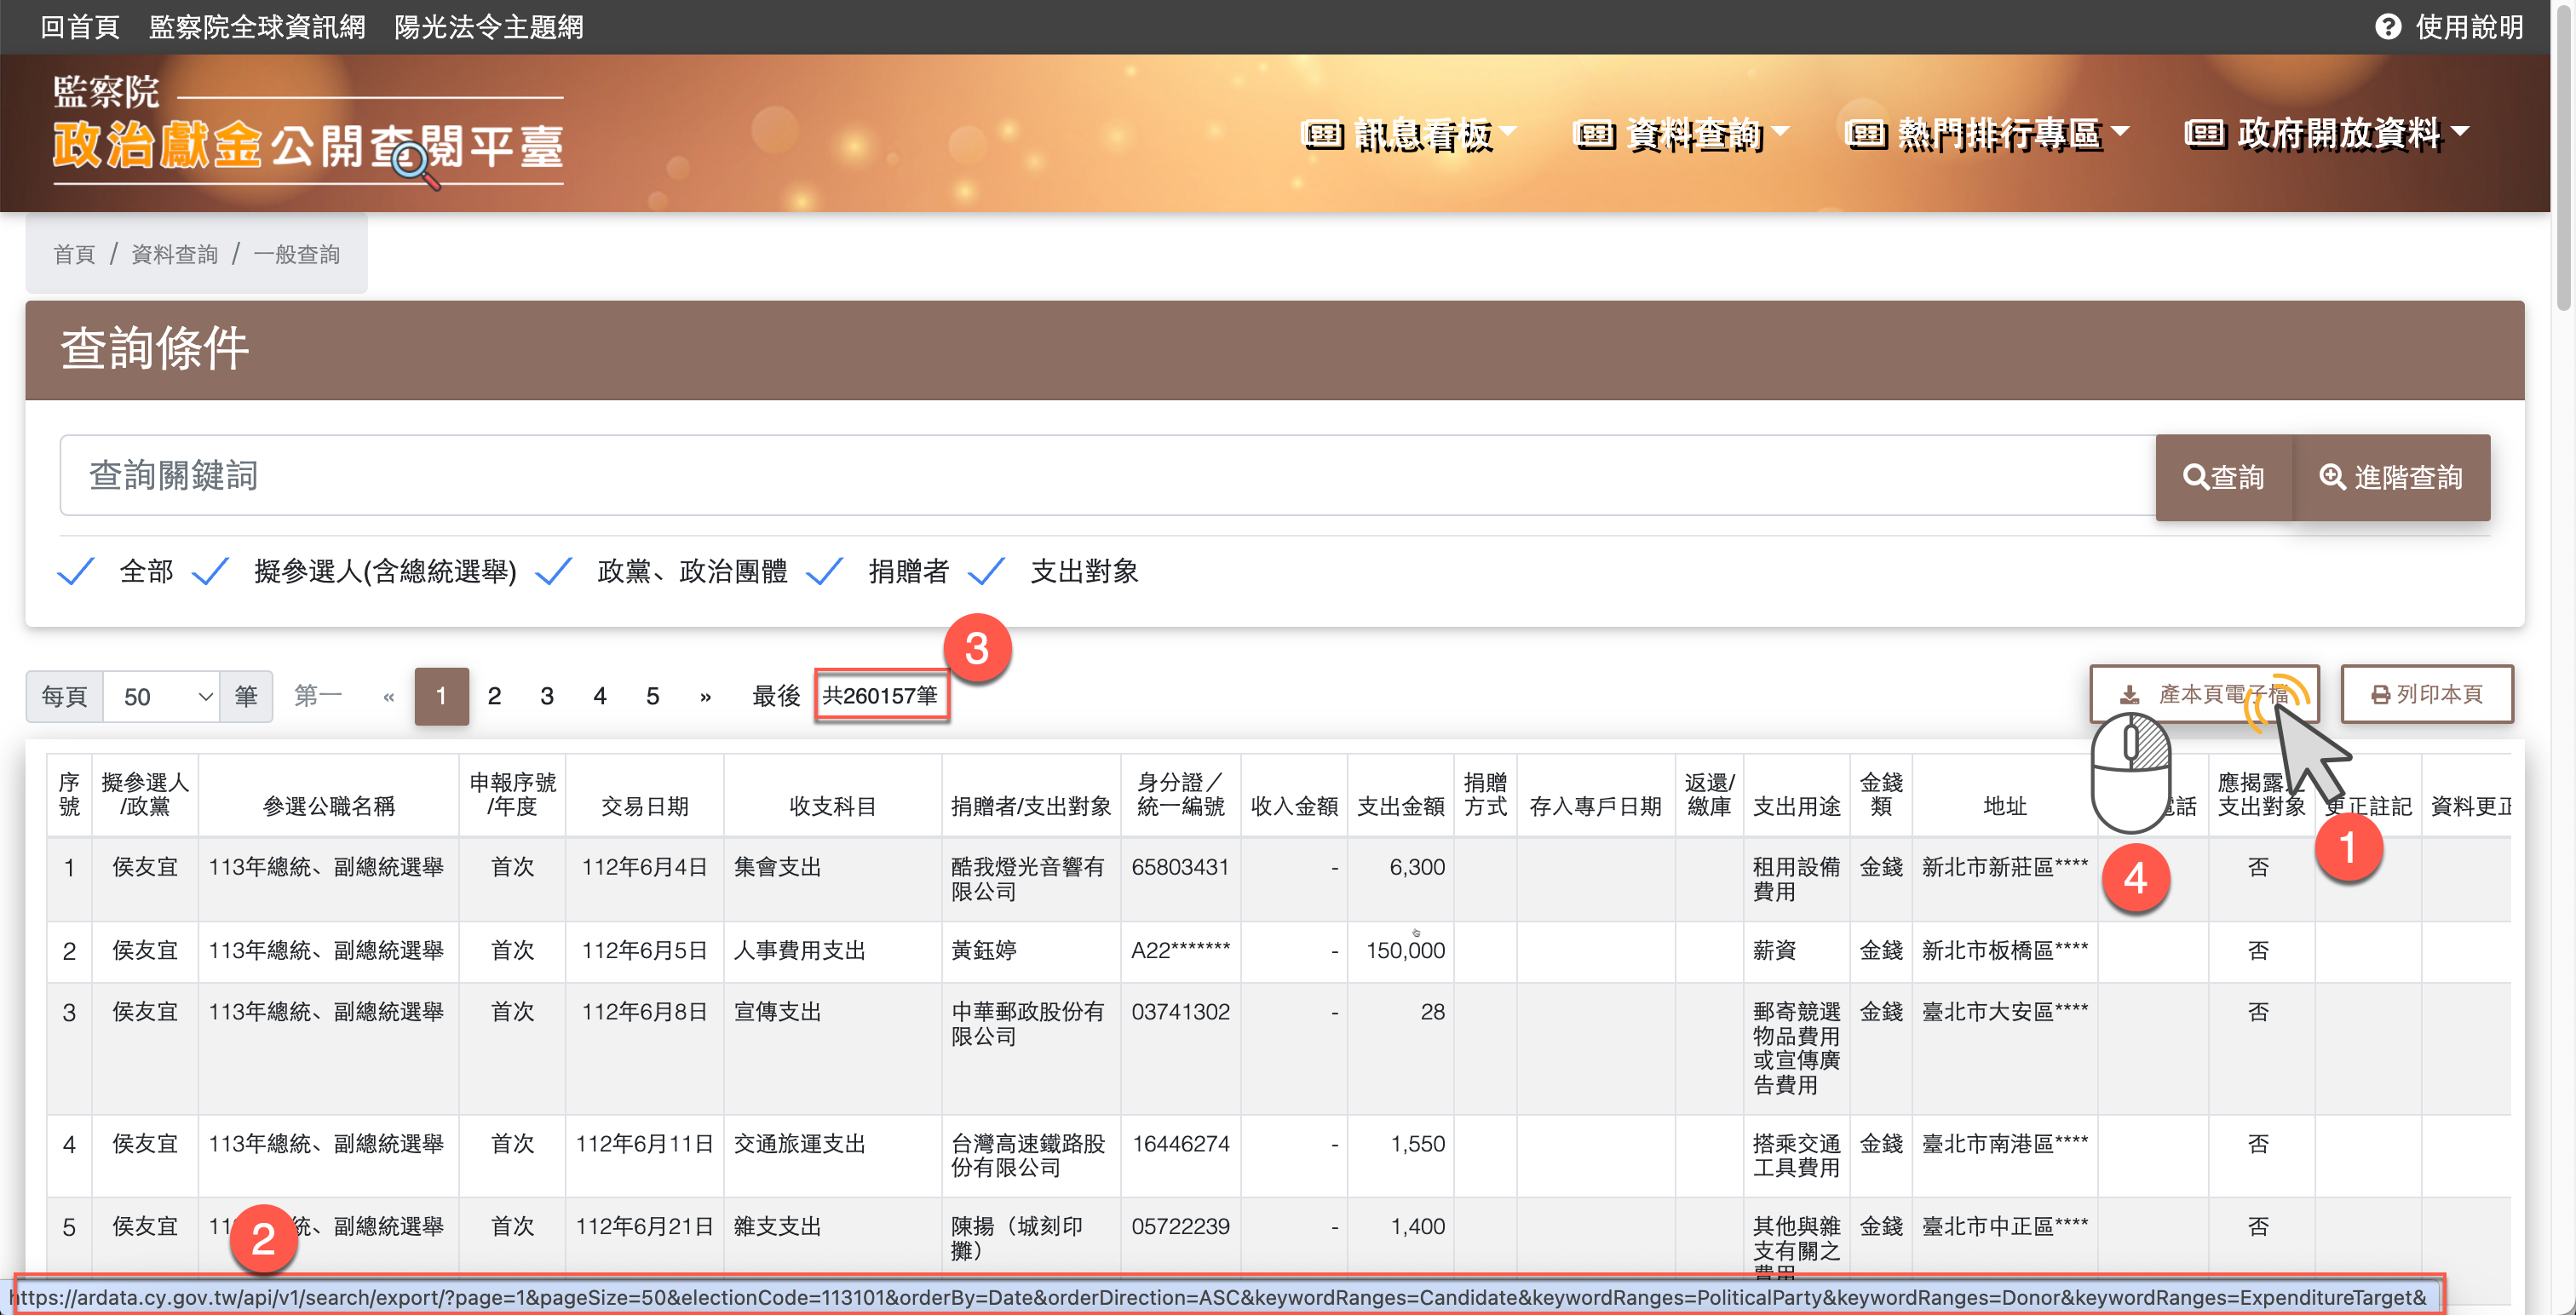

* API網址內容

  ```
  https://ardata.cy.gov.tw/api/v1/search/export/?page=1&pageSize=50&electionCode=113101
    &orderBy=Date&orderDirection=ASC&keywordRanges=Candidate&keywordRanges=PoliticalParty
    &keywordRanges=Donor&keywordRanges=ExpenditureTarget&
  ```

  其中關鍵參數
    + `page=1`
    + `pageSize=50`
    + `electionCode=113101`


In [ ]:
import sys                             # 使用 platform 判斷作業系統
import os                              # 處理檔案及目錄
import time                            # sleep 
from tqdm.notebook import tqdm         # 進度條 Progress bar  

In [ ]:
# 監察院 API 網址
CY_URL = r"https://ardata.cy.gov.tw/api/v1/search/export/"
PAGE_SIZE = 1_000

def get_api_url(ecode:str, page_no:int) -> str:
    """
    回傳監察員政治線間查詢平台資料下載網址

    參數
    ecode        選舉代碼：總統大選 113101，立法委員 113102
    page_no      下載頁碼

    回傳值
    api_url 
    """

    api_url = f"{CY_URL}?page={page_no}&pageSize={PAGE_SIZE}&electionCode={ecode}"

    return api_url
    

In [ ]:
# 測試 API URL
page_no = 1
election = "113101"

url = get_api_url(election, page_no)
print(url)

In [ ]:
# 直接點選上面連接，測試可從 Browser 下載成功

In [ ]:
def create_data_path(path_name):
    """
    檢查目錄是否存在，如果不存在則創建該目錄
    
    參數:
    path_name (str): 要檢查或創建的目錄名稱
    
    返回:
    bool: 如果目錄已存在返回 False，如果目錄被創建返回 True
    """
    if not os.path.exists(path_name):
        os.makedirs(path_name)
        print(f"目錄 '{path_name}' 已新增")
        return
    else:
        print(f"目錄 '{path_name}' 已存在")
        return


In [ ]:
# 資料儲存目錄
data_path = "2024總統大選"
create_data_path(data_path)


In [ ]:
# 僅為人工測試
fname = os.path.join(data_path, "test.csv")
fname

In [ ]:
# 驗證從命令列下載

if sys.platform == "win32":
    !curl "{url}" -o "{fname}" 
    !powershell -command "type {fname} | Select -First 20"
    !del "{fname}"
elif sys.platform == "darwin":
    !curl "{url}" -o "{fname}" 
    !head "{fname}"
    !rm "{fname}"
else:
    assert "未知作業系統"


In [ ]:
def download_data(ecode, page_no, data_dir, outf):
    """
    ecode                 選舉代碼：立法委員 11302 
    page_no               下載頁數
    date_dir              資料目錄，如： 2024選舉
    outf                  資料檔名，不含副檔名，程式自動加上 page_no 及 .csv
    """

    fname = f"{outf}_{page_no}.csv"
    url = get_api_url(ecode, page_no)

    csvf = os.path.join(data_dir, fname)

    # 執行作業系統指令
    !curl "{url}" -o "{csvf}" -s 

    # todo: 未檢查是否成功
    # 1. 透過 csvf 的檔案大小
    
    return csvf

In [ ]:
# 資料總頁數
total_pages = 261                                # 參考之前網頁內容
csv_name = "2024總統大選"                         # 儲存之檔名，不含頁碼及副檔名
delay_sec = 0.1                                  # 每次下載的延遲時間

#total_pages = 10                                # 測試用，避免花太多時間

In [ ]:
# 下載所有檔案
for i in tqdm(range(1,total_pages+1), desc="資料下載"):
    csv_file = download_data(election, i, data_path, csv_name)
    time.sleep(delay_sec)
    

In [ ]:
# 使用作業系統指令檢查檔案
#!dir {data_path}
#!ls -ltr {data_path}


In [ ]:
def show_csv_file(dir_path):
    
    # 取得該目錄下的所有 CSV 檔案
    csv_files = [f for f in os.listdir(dir_path) if f.endswith(".csv")]
    csv_files.sort()

    print(f"檔案數：{len(csv_files)}\n")
    
    print(f"{"檔案名稱":<20}\t{"檔案日期":19} {"檔案大小":^20}")
          
    # 列出檔案資訊
    for file in csv_files:
        file_path = os.path.join(dir_path, file)
        file_size = os.path.getsize(file_path)       
        file_mtime = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(os.path.getmtime(file_path)))
        print(f"{file:<20}\t{file_mtime:19} {file_size:20,d}")
    

In [ ]:
show_csv_file(data_path)